In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transferEntropy import *

/home/rute/.conda/envs/pesquisa/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
def step_signal (low, high, larg_high_i=170, larg_high_f=200, larg_low_i=170, larg_low_f=200, prob_positivo=0.5, n=2000):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high,high,np.random.randint(larg_high_i, larg_high_f))\
                             if x == 1 else np.random.uniform(low,low,np.random.randint(larg_low_i, larg_low_f)) \
                             for x in distrib])
    return signal

In [3]:
def generate_df_valid_corrs(df, limit):
    df_valid = pd.DataFrame(np.zeros([df.shape[0], df.shape[1]], dtype=int), columns = df.columns, index= df.columns)
    for row in df.columns:
        for col in df.columns:
            if df[row][col] > limit:
                df_valid[row][col] = 1
                
    return df_valid 

In [54]:
comps = np.power(2,[2,4,6,8,10])
comps_seq = np.power(2,[6,10,14,18])
signals_one = [step_signal(0,1)[:comp] for comp in comps_seq]
signals_two = [step_signal(0,1)[:comp] for comp in comps_seq]


In [52]:
len(signals_one[4])

262144

In [ ]:
tempos = []
for sig1, sig2 in zip(signals_one, signals_two):
    for dim in np.log2(comps).astype(int):
        start = time.clock()
        te(dim//2, dim//2, 1, sig1, sig2, 'a', 'b')
        end = time.clock()
        tempos.append(end-start)
 

In [33]:
tempos[20:25]

[0.04630799999995361,
 0.08609999999998763,
 0.2339519999999311,
 0.8706170000000384,
 3.27213299999994]

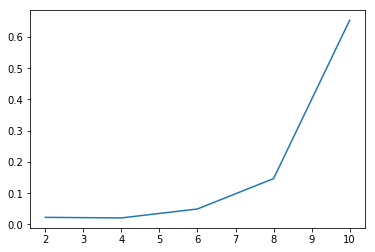

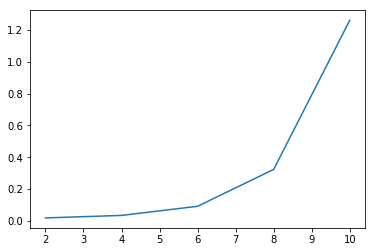

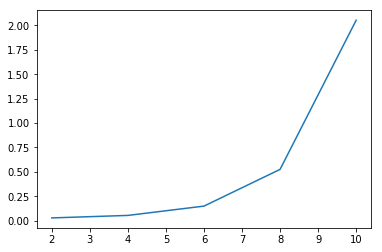

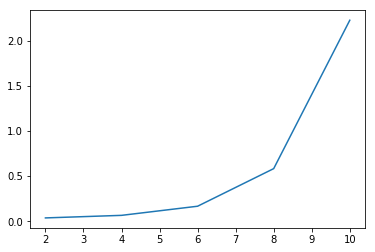

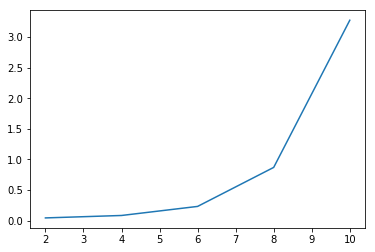

In [34]:
for i in np.arange(0,5):
    plt.plot(np.log2(comps).astype(int),tempos[i*5:(i+1)*5])
    plt.show()